In [2]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Loading the built-in IMDb review dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.imdb.load_data()

print('Training data shape: ', X_train.shape, ', ', Y_train.shape)
print('Test data shape: ', X_test.shape, ', ', Y_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape:  (25000,) ,  (25000,)
Test data shape:  (25000,) ,  (25000,)


In [4]:
print(X_train[0])
print(X_test[1])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 14, 22, 3443, 6, 176, 7, 5063, 8

-> This shows that the data in the dataset is already integer encoded. Let's check if the length of every vector is same or not.

In [5]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))
print(len(X_test[0]), len(X_test[1]), len(X_test[2]))

218 189 141
68 260 603


-> Clearly, the length is not the same. So, we have to zero pad all the vectors to make them the same length.

In [6]:
# Applying zero padding
X_train = tf.keras.utils.pad_sequences(X_train, padding='post')
X_test = tf.keras.utils.pad_sequences(X_test, padding='post')

print('Training data shape: ', X_train.shape, ', ', Y_train.shape)
print('Test data shape: ', X_test.shape, ', ', Y_test.shape)

Training data shape:  (25000, 2494) ,  (25000,)
Test data shape:  (25000, 2315) ,  (25000,)


-> Now every vector in the training data has length of 2494 and in test data, has length of 2315. We can verify by again checking the length.

In [7]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]))
print(len(X_test[0]), len(X_test[1]), len(X_test[2]))

2494 2494 2494
2315 2315 2315


-> This creates inconsistency. The train data and test data are of different lengths which can cause problems at input. We have to make them the same length.

In [8]:
X_test = tf.keras.utils.pad_sequences(X_test, padding='post', maxlen = len(X_train[0]))

print('Training data shape: ', X_train.shape, ', ', Y_train.shape)
print('Test data shape: ', X_test.shape, ', ', Y_test.shape)

Training data shape:  (25000, 2494) ,  (25000,)
Test data shape:  (25000, 2494) ,  (25000,)


-> Now both are of the same length, which provides consistency on the input of the model.

In [9]:
# Checking the labels
print(Y_train[0], Y_train[1], Y_train[2])
print(Y_test[0], Y_test[1], Y_test[2])

1 0 0
0 1 1


-> This shows the sentiment of the sentences. '1' means positive sentiment, '0' means negative sentiment.

<hr>

## <b>Using Learned Embedding</b>

In [10]:
# Getting the vocabulary size
word_index = tf.keras.datasets.imdb.get_word_index()
vocab_size = len(word_index) + 1
print("Vocabulary size:", vocab_size)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Vocabulary size: 88585


In [18]:
# Building the RNN

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_shape=(2494,)),
    tf.keras.layers.SimpleRNN(64, return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 2494, 128)           │      11,338,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,351,297 (43.30 MB)

 Trainable params: 11,351,297 (43.30 MB)

 Non-trainable params: 0 (0.00 B)

<p>Each vector has 2494 words (timesteps), where each word is represented by a single integer (not a vector). So, the input shape to the model is (2494,) — meaning one sentence of 2494 integer-encoded tokens. This is the shape that the Embedding layer expects: a sequence of word indices, not vectors.
<br><br>
The Embedding layer takes this 1D sequence and transforms each integer into a dense vector of fixed size (e.g., 128), resulting in an output of shape (2494, 128) — 2494 words, each mapped to a 128-dimensional vector.
<br><br>
This transformed sequence is then passed to the RNN layer, which expects input in the format (timesteps, input_features) — in this case, (2494, 128). The RNN processes the sequence word by word, capturing contextual information over time.
<br><br>
The activation function in SimpleRNN is by default 'tanh'. We set return_sequences = False because this is a many-to-one problem — we only care about the final output (i.e., whether the entire sentence is positive or negative), not the output at each word/timestep.</p>
<br>

-> 88585x128 = 11,338,880 <br>
(128x64 + 64) + (64x64) = 12,352 <br>
64x1 + 1 = 65

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(
   X_train, Y_train,
   epochs = 10,
   validation_data = (X_test, Y_test)
)  # Batch size is taken to be 32 (by default)

Epoch 1/10


I0000 00:00:1751610460.134030      99 service.cc:148] XLA service 0x7db568059c50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751610460.134574      99 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751610460.414900      99 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1751610461.181313      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 184s 231ms/step - accuracy: 0.4940 - loss: 0.6967 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 179s 229ms/step - accuracy: 0.4951 - loss: 0.6953 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 179s 228ms/step - accuracy: 0.4910 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6965
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 179s 229ms/step - accuracy: 0.4975 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 179s 229ms/step - accuracy: 0.4960 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6971
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 179s 229ms/step - accuracy: 0.4916 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 179s 229ms/step - accuracy: 0.4984 - loss: 0.6959 - val_accuracy: 0.4965 - val_loss: 0.6971
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 179s 229ms/step - accuracy: 0.4982 - loss: 0.69

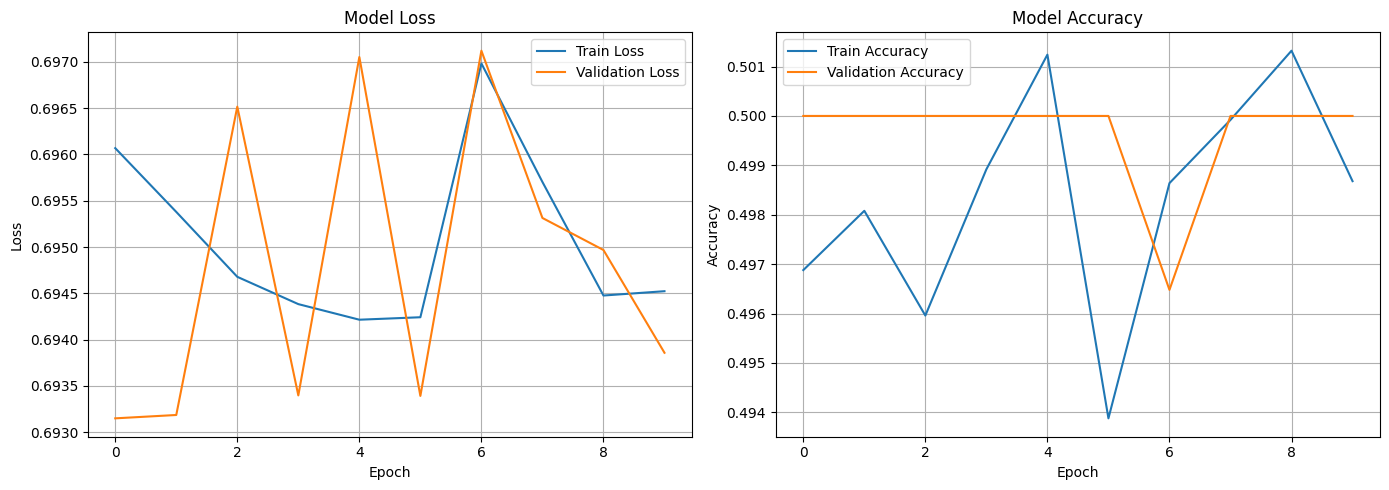

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(history.history['accuracy'], label='Train Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Model Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

-> Model hasn't learned anything. Its validation accuracy is the same from where it started. This is the case of underfitting.

<hr>